In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [31]:
sns.set_style("whitegrid")

In [32]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [33]:
train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [34]:
test.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [35]:
print(train.shape)
train = train.drop_duplicates()
print(train.shape)

(19219, 35)
(19219, 35)


In [36]:
train["defect"] = np.where(
    train["Pastry"] == 1, "Pastry",
    np.where(train["Z_Scratch"] == 1, "Z_Scratch",
             np.where(train["K_Scatch"] == 1, "K_Scatch",
                      np.where(train["Stains"] == 1, "Stains",
                               np.where(train["Dirtiness"] == 1, "Dirtiness",
                                        np.where(train["Bumps"] == 1, "Bumps",
                                                 np.where(train["Other_Faults"] == 1, "Other_Faults", "No_Defect")))))))

In [37]:
label_encoder = LabelEncoder()

In [38]:
label_encoder = label_encoder.fit(train["defect"])
train["defect"] = label_encoder.transform(train["defect"])

In [39]:
label_encoder.classes_

array(['Bumps', 'Dirtiness', 'K_Scatch', 'No_Defect', 'Other_Faults',
       'Pastry', 'Stains', 'Z_Scratch'], dtype=object)

In [40]:
train["defect"].value_counts()

defect
4    6540
0    4761
2    3431
5    1466
7    1150
3     818
6     568
1     485
Name: count, dtype: int64

<Axes: xlabel='defect'>

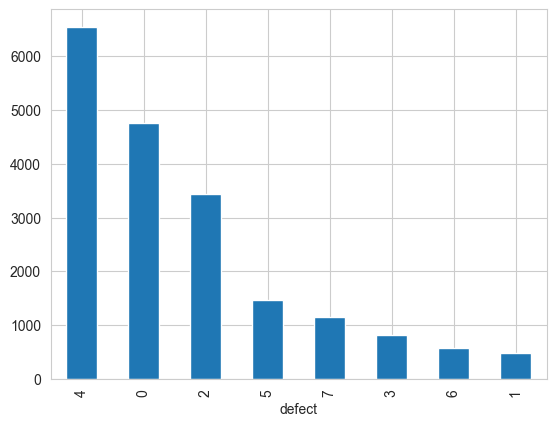

In [41]:
train["defect"].value_counts().plot(kind="bar")

In [42]:
pd.DataFrame(label_encoder.classes_, columns=["Defect"]).to_csv("data/defect_classes.csv", index=False)

In [43]:
train = train.drop(["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"], axis=1)

In [44]:
train = train.drop("id", axis=1)

In [70]:
test = test.drop("id", axis=1)

In [45]:
train = train.drop(["Y_Minimum", "Y_Maximum", "TypeOfSteel_A400"], axis=1)

In [71]:
test = test.drop(["Y_Minimum", "Y_Maximum", "TypeOfSteel_A400"], axis=1)

In [46]:
standard_scaler = StandardScaler()

In [49]:
columns_to_scale = train.drop(["defect", "TypeOfSteel_A300", "Outside_Global_Index"], axis=1).columns

In [47]:
# Exclude the target column, TypeOfSteel_A300 and Outside_Global_Index
train_scaled = standard_scaler.fit_transform(train.drop(["defect", "TypeOfSteel_A300", "Outside_Global_Index"], axis=1))

In [54]:
for i, col in enumerate(columns_to_scale):
    train[col] = train_scaled[:, i]

In [73]:
test_scaled = standard_scaler.transform(test.drop(["TypeOfSteel_A300", "Outside_Global_Index"], axis=1))

In [74]:
for i, col in enumerate(columns_to_scale):
    test[col] = test_scaled[:, i]

In [55]:
train.iloc[:, :15].head()

,X_Minimum,X_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index
0,-0.236778,-0.327831,-0.447155,-0.492949,-0.585088,-0.428885,0.978888,0.799671,-0.696258,0,-0.486053,1.211284,-0.074992,-0.287248,-0.522389
1,0.184647,0.124329,-0.335365,-0.425464,-0.100187,-0.333403,-0.514188,-1.243070,1.563902,1,0.070218,1.330105,-0.978808,-1.219680,-0.554101
2,-1.262119,-1.124112,2.601456,3.426816,3.521726,2.532830,-1.937820,0.870111,-0.407727,0,-0.671477,-0.931879,0.957711,1.599588,1.629799
3,0.133850,0.070310,-0.395147,-0.447959,-0.347586,-0.426785,1.013611,0.377035,-0.497034,0,-0.671477,1.151404,-0.612287,-0.929812,-0.554101
4,1.561802,1.612854,-0.311774,-0.133028,0.028460,-0.324913,-0.097516,-1.243070,1.598251,0,4.149538,-0.726843,1.010071,-1.889997,-0.241209


In [56]:
train.iloc[:, 15:].head()

,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,defect
0,1.732355,0.761892,0.0,-1.669010,-0.875450,-1.703257,-1.235969,1.063494,-1.294971,6
1,-1.640168,0.761892,1.0,0.214350,-1.142425,0.844958,1.310641,-1.340511,1.135420,4
2,-1.701772,-2.018246,0.0,2.081276,1.851790,2.021418,-0.232212,0.365477,1.288636,2
3,-1.078081,0.449619,1.0,-0.198900,-1.142425,0.102736,1.156438,0.815864,-0.509925,2
4,-1.817787,0.698985,1.0,0.389091,0.218738,1.210891,1.667237,-0.890123,1.288034,4


In [57]:
train["Outside_Global_Index"] = train["Outside_Global_Index"].astype("int")

In [75]:
test["Outside_Global_Index"] = test["Outside_Global_Index"].astype("int")

In [58]:
train.iloc[:, 15:].head()

,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,defect
0,1.732355,0.761892,0,-1.669010,-0.875450,-1.703257,-1.235969,1.063494,-1.294971,6
1,-1.640168,0.761892,1,0.214350,-1.142425,0.844958,1.310641,-1.340511,1.135420,4
2,-1.701772,-2.018246,0,2.081276,1.851790,2.021418,-0.232212,0.365477,1.288636,2
3,-1.078081,0.449619,1,-0.198900,-1.142425,0.102736,1.156438,0.815864,-0.509925,2
4,-1.817787,0.698985,1,0.389091,0.218738,1.210891,1.667237,-0.890123,1.288034,4


In [59]:
train.shape

(19219, 25)

In [64]:
weights = {
    0: 19219 / 4761 / 8,
    1: 19219 / 485 / 8,
    2: 19219 / 3431 / 8,
    3: 19219 / 818 / 8,
    4: 19219 / 6540 / 8,
    5: 19219 / 1466 / 8,
    6: 19219 / 568 / 8,
    7: 19219 / 1150 / 8
}

In [65]:
weights

{0: 0.5045946229783659,
 1: 4.953350515463917,
 2: 0.7001967356455844,
 3: 2.936888753056235,
 4: 0.367335626911315,
 5: 1.6387278308321964,
 6: 4.229533450704225,
 7: 2.089021739130435}

In [68]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight=weights, random_state=42)
rf_model.fit(train.drop("defect", axis=1), train["defect"])
rf_model.feature_importances_

array([0.04576025, 0.0444685 , 0.06149956, 0.0423019 , 0.0358297 ,
       0.0471142 , 0.04169654, 0.02832168, 0.05994722, 0.02089377,
       0.04699023, 0.03949343, 0.03870859, 0.03691667, 0.05045368,
       0.03617355, 0.02835459, 0.00716304, 0.07018636, 0.05217764,
       0.0386746 , 0.04328579, 0.040599  , 0.04298949])

<Axes: ylabel='None'>

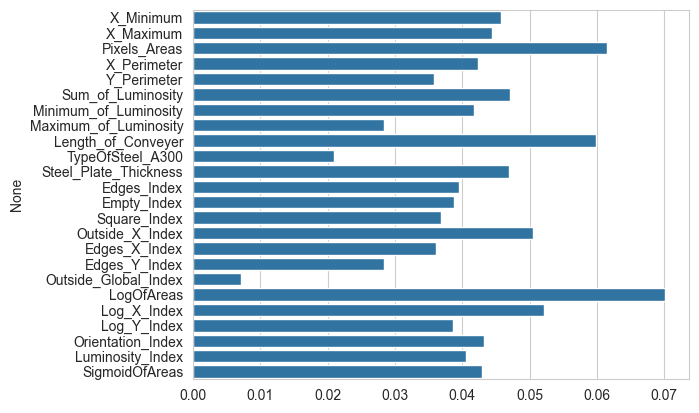

In [69]:
sns.barplot(x=rf_model.feature_importances_, y=train.drop("defect", axis=1).columns)

In [76]:
train.to_csv("data/with_outliers_and_uncorrelated/train_cleaned.csv", index=False)

In [77]:
test.to_csv("data/with_outliers_and_uncorrelated/test_cleaned.csv", index=False)

In [79]:
X_train, X_val, y_train, y_val = train_test_split(train.drop("defect", axis=1), train["defect"], test_size=0.2, random_state=42)

In [81]:
np.save("data/with_outliers_and_uncorrelated/X_train.npy", X_train.to_numpy())
np.save("data/with_outliers_and_uncorrelated/X_val.npy", X_val.to_numpy())
np.save("data/with_outliers_and_uncorrelated/y_train.npy", y_train.to_numpy())
np.save("data/with_outliers_and_uncorrelated/y_val.npy", y_val.to_numpy())
np.save("data/with_outliers_and_uncorrelated/X_test.npy", test.to_numpy())